In [32]:
import pandas as pd
import matplotlib.pyplot as plt
base = pd.read_csv('Datasets/MoviesOnStreamingPlatforms.csv')
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9515 entries, 0 to 9514
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       9515 non-null   int64 
 1   ID               9515 non-null   int64 
 2   Title            9515 non-null   object
 3   Year             9515 non-null   int64 
 4   Age              5338 non-null   object
 5   Rotten Tomatoes  9508 non-null   object
 6   Netflix          9515 non-null   int64 
 7   Hulu             9515 non-null   int64 
 8   Prime Video      9515 non-null   int64 
 9   Disney+          9515 non-null   int64 
 10  Type             9515 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 817.8+ KB


In [3]:
base.head()

,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,The Irishman,2019,18+,98/100,1,0,0,0,0
1,1,2,Dangal,2016,7+,97/100,1,0,0,0,0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,4,5,Roma,2018,18+,94/100,1,0,0,0,0


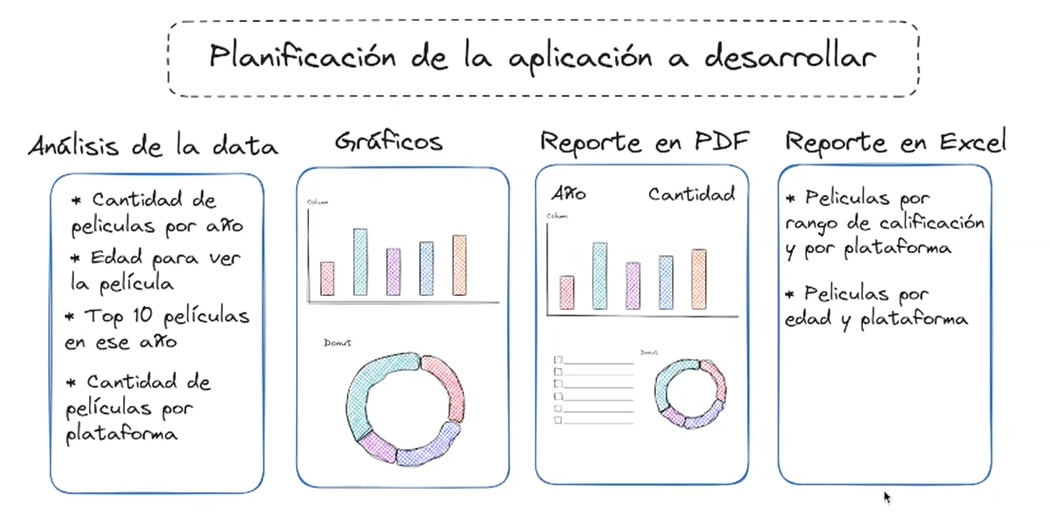

## Análisis de la data

In [10]:
cantidad_year = base.groupby(by = 'Year').count()[['ID']].reset_index() #Número de películas por año
cantidad_year.columns = ['Year','Amount']
cantidad_year

,Year,Amount
0,1914,1
1,1915,2
2,1916,1
3,1919,1
4,1920,2
...,...,...
98,2017,831
99,2018,945
100,2019,1014
101,2020,862


In [11]:
year = 2021
base_filtrada_year = base[base['Year']==year]

cantidad_aux = base.groupby(by = 'Age').count()[['ID']].reset_index() #Número de películas por año
cantidad_aux.columns = ['Year','Amount']
cantidad_aux

,Year,Amount
0,13+,998
1,16+,276
2,18+,2276
3,7+,1090
4,all,698


In [23]:
# Otro método para crear el ranking
base['Rotten Tomatoes'].str.split('/',expand = True)[0].fillna(0)

0       98
1       97
2       95
3       94
4       94
        ..
9510    14
9511    13
9512    13
9513    10
9514    10
Name: 0, Length: 9515, dtype: object

In [24]:
def select_characters(n):
    try:
        return n[:2]#Tomo los dos primeros caracteres
    except:
        return 0

base['Ranking'] = base['Rotten Tomatoes'].apply(select_characters).astype(int)

base.sort_values(by = 'Ranking', ascending = False)[:10][['Title','Age']].reset_index(drop = True)

,Title,Age
0,The Irishman,18+
1,Dangal,7+
2,Mary Poppins,all
3,David Attenborough: A Life on Our Planet,7+
4,The Dark Knight,13+
5,Lagaan: Once Upon a Time in India,7+
6,Roma,18+
7,To All the Boys I've Loved Before,13+
8,The Social Dilemma,13+
9,Tumbbad,NaN


In [27]:
year = 2021
base_filtrada_year = base[base['Year']==year]

base_filtrada_year[['Netflix','Hulu','Prime Video','Disney+']].sum()

Netflix        201
Hulu            37
Prime Video     63
Disney+         28
dtype: int64

## Gráficos

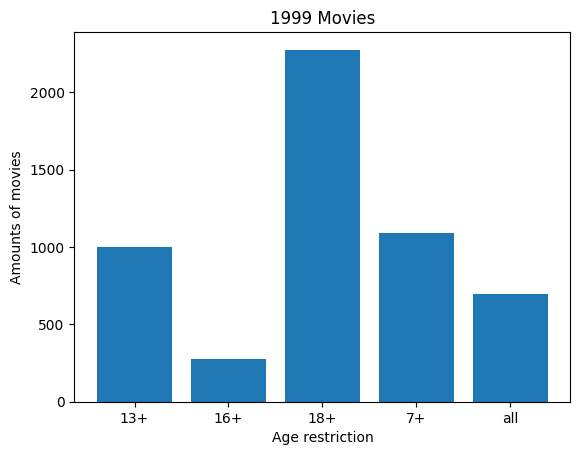

In [55]:
year = 1999
base_filtrada_year = base[base['Year']==year]

cantidad_por_edad = base.groupby(by = 'Age').count()[['ID']].reset_index() #Número de películas por año
cantidad_por_edad.columns = ['Age restriction','Amount']
plt.bar(cantidad_por_edad['Age restriction'],cantidad_por_edad['Amount'])

plt.xlabel('Age restriction')
plt.ylabel('Amounts of movies')
plt.title(f'{year} Movies')

plt.show()

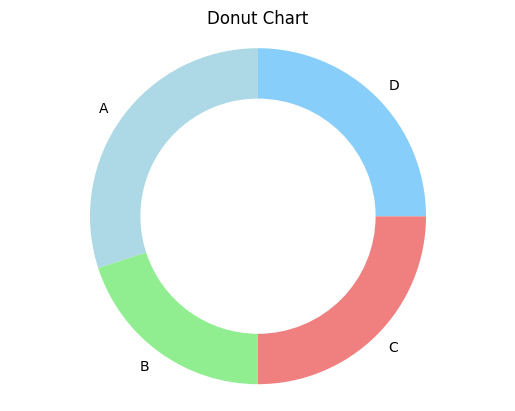

In [36]:
year = 2021
base_filtrada_year = base[base['Year']==year]

base_plataforma = base_filtrada_year[['Netflix','Hulu','Prime Video','Disney+']].sum()

# Sample data
labels = ['A', 'B', 'C', 'D']
sizes_outer = [30, 20, 25, 25]  # Outer circle sizes
sizes_inner = [10, 10, 10, 10]  # Inner circle sizes
colors_outer = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue']  # Outer circle colors
colors_inner = ['white', 'white', 'white', 'white']  # Inner circle colors

# Plotting the outer pie chart (donut)
plt.pie(base_plataforma[''], labels=labels, colors=colors_outer, startangle=90, wedgeprops=dict(width=0.3))

# Plotting the inner pie chart (hole)
plt.pie(sizes_inner, colors=colors_inner, radius=0.6, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Adding a circle in the center to make it look like a donut
centre_circle = plt.Circle((0,0),0.4,color='white',fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Display the plot
plt.title('Donut Chart')
plt.show()

## Generador de gráficos clase

In [49]:
import altair as alt
years = base[base['Year'] >= 1990]['Year'].unique()
years.sort()
 
for year in years:
    base_filtrada_year = base[base['Year']==year]
    cantidad_year = base_filtrada_year.groupby(by='Age').count()[['ID']].reset_index()
    cantidad_year.columns = ['Age','Amount']
    cantidad_year['Year'] = year
 
    if year == years[0]:
        df = cantidad_year
    else:
        df = pd.concat([df,cantidad_year])
 
df['Year'] = df['Year'].astype(str)
alt.Chart(df).mark_bar().encode(
    x='Year:O',
    y='Amount:Q',
    color='Age:N'
)



alt.Chart(...)

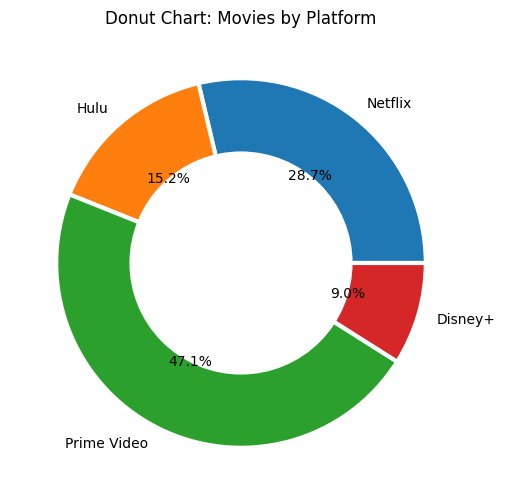

In [54]:
year = 2010
 
base_filtrada_year = base[base['Year']==year]
cantidad_year = base_filtrada_year[['Netflix','Hulu','Prime Video','Disney+']].sum().reset_index()
cantidad_year.columns = ['Platform','Amount']
 
plt.figure(figsize=(6, 6))
plt.pie(cantidad_year['Amount'], labels=cantidad_year['Platform'], autopct='%1.1f%%', wedgeprops={'linewidth': 3, 'edgecolor': 'white'})
plt.gca().add_artist(plt.Circle((0, 0), 0.6, color='white'))
plt.title('Donut Chart: Movies by Platform')
plt.savefig('Images/donut_platform_year.png')
plt.show()

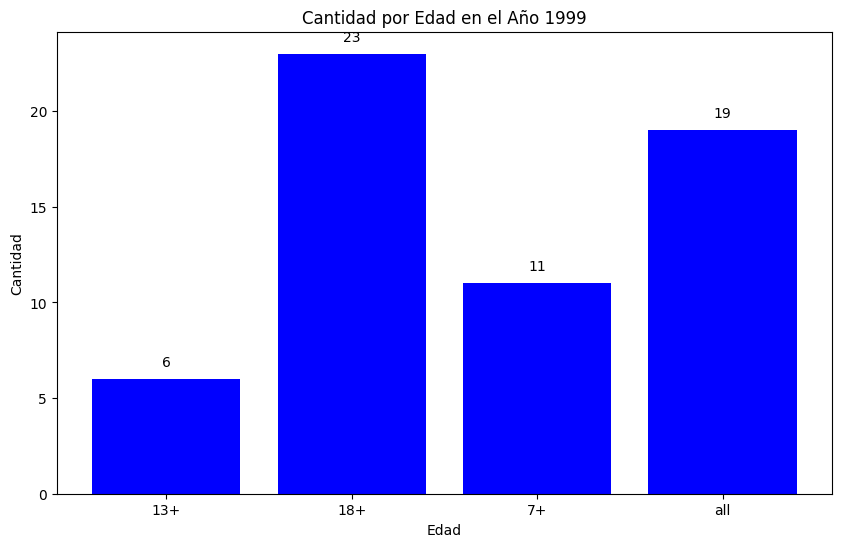

In [56]:
year = 1999
base_filtrada_year = base[base['Year']==year]

cantidad_year = base_filtrada_year.groupby(by='Age').count()[['ID']].reset_index()
cantidad_year.columns = ['Age','Amount']
cantidad_year

# Crear el gráfico de barras usando Matplotlib
plt.figure(figsize=(10, 6))  # Configura el tamaño del gráfico
plt.bar(cantidad_year['Age'], cantidad_year['Amount'], color='blue')  # Crea barras

# Añadiendo título y etiquetas
plt.title('Cantidad por Edad en el Año 1999')
plt.xlabel('Edad')
plt.ylabel('Cantidad')

# Mostrar valores en las barras
for i, v in enumerate(cantidad_year['Amount']):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom')

# Mostrar el gráfico
plt.savefig('images/histogram_age_year.png')
plt.show()

## Reporte en pdf

In [58]:
from fpdf import FPDF

class PDFWithBackground(FPDF):
    def __init__(self):
        super().__init__()
        self.background = None
 
    def set_background(self, image_path):
        self.background = image_path
 
    def add_page(self, orientation=''):
        super().add_page(orientation)
        if self.background:
            self.image(self.background, 0, 0, self.w, self.h)
 
    def footer(self):
        # Posición a 1.5 cm desde el fondo
        self.set_y(-15)
        # Configurar la fuente para el pie de página
        self.set_font('Arial', 'I', 8)
        # Número de página
        self.cell(0, 10, 'Página ' + str(self.page_no()), 0, 0, 'C')

In [66]:
pdf = PDFWithBackground()
pdf.set_background('Images/background.png')
pdf.add_page()

pdf.set_y(45)
pdf.set_font('Courier',style = 'B', size = 27) # Vienen por defecto, Arial, Times, Courier
pdf.cell(0,0,'Mi primer reporte',0,1,'R')

pdf.set_y(54)
pdf.set_font('Courier', size = 14) # Vienen por defecto, Arial, Times, Courier
pdf.cell(0,0,'Desarrollado con python :D',0,1,'R')

pdf.set_y(75)
pdf.set_font('Courier',size = 20) # Vienen por defecto, Arial, Times, Courier
pdf.cell(0,0,'reporte general por aos y edades permitidas',0,1,'R')

imagen = 'visualization.png'

pdf.image(f'Images/{imagen}',x=15,y=83,w=190,h=65)

pdf.add_page()

year = 2020

pdf.set_y(54)
pdf.set_font('Courier', style = 'B', size = 27) # Vienen por defecto, Arial, Times, Courier
pdf.cell(0,0,f'Reporte del año {year}',0,1,'R')

pdf.output('Mi_Primer_PDF.pdf')


''